<a href="https://colab.research.google.com/github/doandongdu/DUDOAN12/blob/main/NHAN_DIEN_HOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
train_image_files_path = '/content/drive/MyDrive/nhan_dien_hoa/data/train'
valid_image_files_path = '/content/drive/MyDrive/nhan_dien_hoa/data/validation'

In [ ]:
label = ['tulip','huong duong','hoa hong']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1/255)
validation_data_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(train_image_files_path, target_size = (200,200), class_mode = 'categorical')

Found 60 images belonging to 3 classes.


In [ ]:
x_train,y_train = next(train_generator)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 3)

In [ ]:
x_train = x_train.reshape(32,120000)
x_train = x_train.astype ('float32')
x_train = x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 200, batch_size = 128)

In [ ]:
model.save('nhan_dien_hoa.h5')

1/1 [==============================] - 0s 66ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 66ms/step
Đây là hoa: huong duong


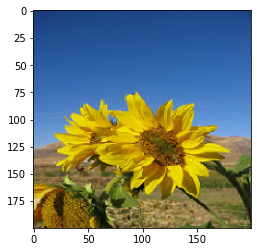

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhan_dien_hoa/data/train/huong duong/45045003_30bbd0a142_m.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", label[a])

1/1 [==============================] - 0s 75ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 48ms/step
Đây là hoa: hoa hong


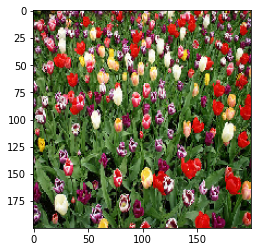

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhan_dien_hoa/data/train/tulip/11746080_963537acdc.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", label[a])

1/1 [==============================] - 0s 51ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 49ms/step
Đây là hoa: hoa hong


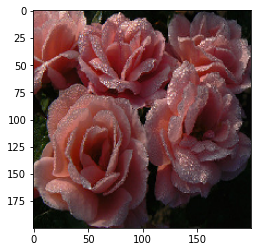

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhan_dien_hoa/data/train/hoa hong/272481307_1eb47ba3e0_n.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", label[a])